In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.stats.api as sts
import statsmodels.formula.api as statsmodels
import pylab

from scipy.stats import shapiro
from scipy.stats import zscore
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
lr=LinearRegression()

In [3]:
r=Ridge()

In [114]:
lb=LabelEncoder()

In [115]:
Train=pd.read_csv('Train_UWu5bXk.txt', sep=',')

In [116]:
Test=pd.read_csv('Test_u94Q5KV.txt')

In [117]:
weight=[]
for i in Train['Item_Identifier']:
    A=Train[Train['Item_Identifier']==i]['Item_Weight'].mean()
    weight.append(A)

In [118]:
len(weight)

8523

In [119]:
Train['Item_Weight']=np.where(Train['Item_Weight'].isnull(), weight, Train['Item_Weight'])

In [120]:
Train[Train['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [121]:
Train[Train['Item_Type']=='Frozen Foods']['Item_Weight'].median()

12.85

In [122]:
Train.loc[927,'Item_Weight']=12.85

In [123]:
Train[Train['Item_Type']=='Snack Foods']['Item_Weight'].median()

13.15

In [124]:
Train.loc[1922,'Item_Weight']=13.15

In [125]:
Train[Train['Item_Type']=='Dairy']['Item_Weight'].median()

13.35

In [126]:
Train.loc[4187, 'Item_Weight']=13.35

In [127]:
Train[Train['Item_Type']=='Baking Goods']['Item_Weight'].median()

11.65

In [128]:
Train.loc[5022, 'Item_Weight']=11.65

In [129]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [130]:
Test[Test['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
12,NCC54,NaN,Low Fat,0.171079,Health and Hygiene,240.4196,OUT019,1985,Small,Tier 1,Grocery Store
18,NCM42,NaN,Low Fat,0.028184,Household,109.6912,OUT027,1985,Medium,Tier 3,Supermarket Type3
23,NCL19,NaN,Low Fat,0.027447,Others,142.3470,OUT019,1985,Small,Tier 1,Grocery Store
30,NCR42,NaN,Low Fat,0.067377,Household,32.0900,OUT019,1985,Small,Tier 1,Grocery Store
33,FDU31,NaN,Regular,0.024870,Fruits and Vegetables,217.7508,OUT027,1985,Medium,Tier 3,Supermarket Type3
35,FDR03,NaN,Regular,0.008694,Meat,205.0980,OUT027,1985,Medium,Tier 3,Supermarket Type3
36,FDS49,NaN,Low Fat,0.078961,Canned,80.3644,OUT027,1985,Medium,Tier 3,Supermarket Type3
39,NCD43,NaN,Low Fat,0.015942,Household,103.3964,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [131]:
Test[Test['Item_Identifier']=='FDY38']['Item_Weight']

4        NaN
1327    13.6
3622    13.6
4504    13.6
Name: Item_Weight, dtype: float64

In [132]:
L1=[]
for i in Test['Item_Identifier']:
    L1.append(Test[Test['Item_Identifier']==i]['Item_Weight'].median())

In [133]:
Test['Item_Weight']=np.where(Test['Item_Weight'].isnull, L1, Test['Item_Weight'])

In [134]:
Test[Test['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,LF,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


In [135]:
Test[Test['Item_Type']=='Snack Foods']['Item_Weight'].median()

11.65

In [136]:
Test[Test['Item_Type']=='Fruits and Vegetables']['Item_Weight'].median()

12.85

In [137]:
Test[Test['Item_Type']=='Frozen Foods']['Item_Weight'].median()

11.6

In [138]:
Test[Test['Item_Type']=='Canned']['Item_Weight'].median()

11.8

In [139]:
Test[Test['Item_Type']=='Hard Drinks']['Item_Weight'].median()

10.5

In [140]:
Test[Test['Item_Type']=='Household']['Item_Weight'].median()

13.0

In [141]:
Test.loc[(58,482,882,1300,1571,2302,3619,3909,4298,),'Item_Weight']=11.65

In [142]:
Test.loc[(5346,5609,5615),'Item_Weight']=11.6

In [143]:
Test.loc[(884,1297,1741,4496),'Item_Weight']=12.85

In [144]:
Test.loc[(1203,2600),'Item_Weight']=11.8

In [145]:
Test.loc[(3734),'Item_Weight']=10.5

In [146]:
Test.loc[(3875),'Item_Weight']=13

In [147]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [148]:
Train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [149]:
Train.replace('low fat', 'Low Fat', inplace=True)
Train.replace('LF','Low Fat', inplace=True)
Train.replace('reg', 'Regular', inplace=True)

In [150]:
Test.replace('low fat', 'Low Fat', inplace=True)
Test.replace('LF','Low Fat', inplace=True)
Test.replace('reg', 'Regular', inplace=True)

In [151]:
Test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [152]:
Train[Train['Outlet_Size'].isnull()]['Outlet_Location_Type'].unique()

array(['Tier 3', 'Tier 2'], dtype=object)

In [153]:
Train[Train['Outlet_Size'].isnull()]['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [154]:
Train[Train['Outlet_Location_Type']=='Tier 3']['Outlet_Size'].mode()

0    Medium
dtype: object

In [155]:
Train[Train['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].mode()

0    Small
dtype: object

In [156]:
Train[Train['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].mode()

0    Small
dtype: object

In [157]:
Train[Train['Outlet_Type']=='Grocery Store']['Outlet_Size'].mode()

0    Small
dtype: object

In [158]:
Train['Outlet_Size'].fillna('Small', inplace=True)

In [159]:
Test[Test['Outlet_Size'].isnull()]['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store'], dtype=object)

In [160]:
Test['Outlet_Size'].fillna('Small', inplace=True)

In [161]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [162]:
visibilityZ=Train[Train['Item_Visibility']==0]

In [163]:
visibilityZ.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


In [164]:
itemid=visibilityZ.Item_Identifier

In [165]:
rowsno=visibilityZ.index

In [166]:
for i in rowsno:
    Train.loc[i,'Item_Visibility']=Train[Train.Item_Identifier==itemid[i]]['Item_Visibility'].median()

In [167]:
Train[Train['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
10,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
651,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,46.5402,OUT010,1998,Small,Tier 3,Grocery Store,229.7010
4208,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.9402,OUT027,1985,Medium,Tier 3,Supermarket Type3,872.8638
4791,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.2402,OUT018,2009,Medium,Tier 3,Supermarket Type2,1148.5050


In [168]:
Train[Train['Item_Identifier']=='FDY07']['Item_Visibility'].mean()

0.052234102857142854

In [169]:
Train.loc[(10,651,4208,4791), 'Item_Visibility']=0.052

In [170]:
Train[Train['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [171]:
testvz=Test[Test['Item_Visibility']==0]

In [172]:
indexno=testvz.index

In [173]:
Test[Test['Item_Identifier']=='DRF48']['Item_Visibility'].median()

0.051775014499999994

In [174]:
testitemid=testvz.Item_Identifier

In [175]:
for i in indexno:
    Test.loc[i,'Item_Visibility']=Test[Test['Item_Identifier']==testitemid[i]]['Item_Visibility'].median()

In [176]:
SE=Test[Test['Item_Visibility']==0]

In [177]:
Test[Test['Item_Type']=='Household']['Item_Visibility'].median()

0.045643664

In [178]:
Test.loc[(1634, 4786, 4906), 'Item_Visibility']=0.04

In [179]:
Test[Test['Item_Type']=='Meat']['Item_Visibility'].median()

0.044342365999999994

In [180]:
Test.loc[(90, 5154), 'Item_Visibility']=0.04

In [181]:
Test[Test['Item_Type']=='Canned']['Item_Visibility'].median()

0.050579228

In [182]:
Test.loc[(264, 732, 885, 1653), 'Item_Visibility']=0.05

In [183]:
Test[Test['Item_Type']=='Fruits and Vegetables']['Item_Visibility'].median()

0.057512493

In [184]:
Test.loc[(416, 2884, 4367, 4443, 4736), 'Item_Visibility']=0.05

In [185]:
Test[Test['Item_Type']=='Baking Goods']['Item_Visibility'].median()

0.0624551125

In [186]:
Test.loc[(2201, 2570, 4602), 'Item_Visibility']=0.06

In [187]:
Test[Test['Item_Type']=='Health and Hygiene']['Item_Visibility'].median()

0.051795823000000005

In [188]:
Test.loc[(4918), 'Item_Visibility']=0.05

In [189]:
Test[Test['Item_Type']=='Snack Foods']['Item_Visibility'].median()

0.065381597

In [190]:
Test.loc[(3359,5281), 'Item_Visibility']=0.06

In [191]:
Test[Test['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [192]:
Train['Per_Unit_Price']=Train['Item_MRP']/Train['Item_Weight']

In [193]:
Test['Per_Unit_Price']=Test['Item_MRP']/Test['Item_Weight']

In [194]:
ID=[]
for i in range(0, len(Train)):
    ID.append(Train['Item_Identifier'][i][:2])

In [195]:
Train['ID']=pd.DataFrame(ID)

In [196]:
ID1=[]
for i in range(0, len(Test)):
    ID1.append(Test['Item_Identifier'][i][:2])

In [197]:
Test['ID']=pd.DataFrame(ID1)

In [198]:
Train['Years_Old']=2013-Train['Outlet_Establishment_Year']

In [199]:
Test['Years_Old']=2013-Test['Outlet_Establishment_Year']

In [200]:
Train.drop('Item_Identifier', axis=1, inplace=True)

In [201]:
Train.drop('Outlet_Establishment_Year',axis=1, inplace=True)

In [202]:
Test.drop('Outlet_Establishment_Year',axis=1, inplace=True)

In [203]:
Test.drop('Item_Identifier', axis=1, inplace=True)

In [204]:
Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Per_Unit_Price,ID,Years_Old
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD,14
3,19.20,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,9.484115,FD,15
4,8.93,Low Fat,0.006590,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC,26


In [205]:
Train['Outlet_Size']=lb.fit_transform(Train['Outlet_Size']) #1-Medium, 2-Small 0-high

In [206]:
Test['Outlet_Size']=lb.fit_transform(Test['Outlet_Size'])

In [207]:
Train['Outlet_Location_Type']=lb.fit_transform(Train['Outlet_Location_Type']) #0-Tier1, 2-Tier3, 1-Tier2

In [208]:
Test['Outlet_Location_Type']=lb.fit_transform(Test['Outlet_Location_Type']) #0-Tier1, 2-Tier3, 1-Tier2

In [209]:
Train['Item_Fat_Content']=lb.fit_transform(Train['Item_Fat_Content'])

In [210]:
Test['Item_Fat_Content']=lb.fit_transform(Test['Item_Fat_Content'])

In [211]:
Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Per_Unit_Price,ID,Years_Old
0,9.30,0,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,3735.1380,26.861204,FD,14
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,443.4228,8.153581,DR,4
2,17.50,0,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,2097.2700,8.092457,FD,14
3,19.20,1,0.022861,Fruits and Vegetables,182.0950,OUT010,2,2,Grocery Store,732.3800,9.484115,FD,15
4,8.93,0,0.006590,Household,53.8614,OUT013,0,2,Supermarket Type1,994.7052,6.031512,NC,26


In [212]:
Traindummy=pd.get_dummies(Train)

In [213]:
Testdummy=pd.get_dummies(Test)

In [214]:
Traindummy.shape

(8523, 42)

In [215]:
Testdummy.shape

(5681, 41)

In [216]:
xtrain=Traindummy.drop('Item_Outlet_Sales', axis=1)
xtest=Testdummy
ytrain=Traindummy.Item_Outlet_Sales

In [217]:
ypre=lr.fit(xtrain,ytrain).predict(xtest)

In [218]:
ypre[ypre<0]

array([-1.34171961e+03, -5.94166119e+01, -3.27806829e+01, -1.06923791e+03,
       -6.61710499e+02, -3.71788667e+02, -3.72543651e+02, -1.58628908e+02,
       -2.37376905e+02, -1.18184338e+03, -2.02294268e+02, -9.98893697e+02,
       -1.25500918e+03, -1.82828006e+02, -1.20004362e+03, -2.54216868e+02,
       -8.25292313e+02, -5.25682415e+02, -5.05952935e+02, -9.87472124e+02,
       -2.75374504e+02, -1.17417178e+03, -4.32767277e+02, -3.41769256e+02,
       -2.56028421e+02, -6.38934960e+02, -1.61056405e+02, -1.27788829e+03,
       -1.32851985e+03, -5.12763561e+02, -1.54078946e+02, -9.35656812e+02,
       -2.73651198e+02, -6.06134409e+02, -4.70201466e+02, -2.10115308e+02,
       -1.89258891e+02, -4.62173252e+02, -3.65984421e+02, -2.15961436e+02,
       -1.30932995e+03, -1.29733681e+03, -5.85715122e+01, -1.26386200e+02,
       -1.20715603e+03, -3.71484106e+02, -1.20889527e+03, -7.80142187e+01,
       -9.56494753e+02, -1.20657988e+03, -1.14599582e+03, -1.03249212e+03,
       -2.34069937e+02, -

In [108]:
xxx = pd.DataFrame({"Item_Identifier":Test.Item_Identifier,
              "Outlet_Identifier":Test.Outlet_Identifier,
             "Item_Outlet_Sales":predEN})

AttributeError: 'DataFrame' object has no attribute 'Item_Identifier'

In [ ]:
xxx.to_csv("xxx.csv",index=False)

In [109]:
Rpred=r.fit(xtrain, ytrain).predict(xtest)

In [110]:
sum(r.coef_**2)

3243006.0728477603

In [114]:
R=Ridge(alpha=100)

In [115]:
RA=R.fit(xtrain, ytrain).predict(xtest)

In [116]:
sum(R.coef_**2)

2842364.3466312774

In [117]:
r.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [118]:
params={'alpha':[0.01,0.5,1,2,3,4,0.02,0.09,10,50],
       'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
       'random_state':[1,2,3,500]}

In [119]:
grid=GridSearchCV(estimator=r, cv=10,param_grid=params)

In [120]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.5, 1, 2, 3, 4, 0.02, 0.09, 10, 50], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'random_state': [1, 2, 3, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [121]:
grid.best_params_

{'alpha': 10, 'random_state': 1, 'solver': 'sparse_cg'}

In [174]:
r=Ridge(alpha=10,random_state=1,solver="sparse_cg")

In [175]:
RR=r.fit(xtrain,ytrain).predict(xtest)

In [176]:
predictors=xtest.columns
r.coef_

array([-8.95813224e+00,  3.51726013e+01, -4.72322926e+01,  1.63149671e+01,
       -1.69040488e+02,  8.74797634e+01, -8.36550124e+00, -2.39533910e+00,
       -3.74700549e+00,  4.62651363e+00, -5.58828445e+00,  2.42473962e+01,
       -3.27355987e+01, -1.54171235e+01,  2.54753878e+01,  4.61401591e+00,
        6.44510935e+00, -8.71423853e+00, -8.10102013e-01, -6.22817652e+00,
        1.13660833e+01, -5.28626744e+00, -3.68530838e+00,  5.43759877e+00,
       -5.50043833e+02, -2.86969876e+02,  1.63072436e+02, -1.14025218e+02,
       -4.47115420e+02,  7.98923555e+02,  1.91331054e+02,  3.73070179e+01,
        1.49438380e+02,  5.80819037e+01, -9.97159253e+02,  3.12260916e+02,
       -1.14025218e+02,  7.98923555e+02, -2.22773273e+00,  1.07250384e+01,
       -8.49730571e+00])

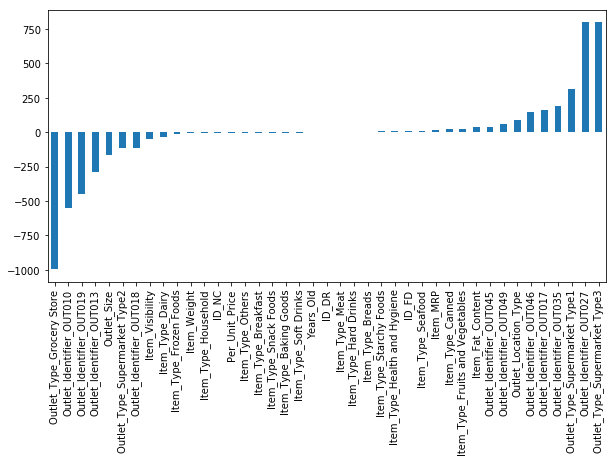

In [177]:
#Alpha=1
plt.figure(figsize=(10,5))
pd.Series(r.coef_,predictors).sort_values().plot(kind='bar')

### Lasso

In [178]:
l=Lasso(alpha=10, random_state=1)

In [179]:
PreLa=l.fit(xtrain, ytrain).predict(xtest)

In [180]:
l.coef_

array([-5.87997289e+00,  7.66648892e+00, -0.00000000e+00,  1.60742717e+01,
       -0.00000000e+00, -0.00000000e+00, -5.77865738e+00,  2.60510009e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.72646022e+00, -3.87399509e+01,
       -0.00000000e+00,  1.44379425e+03,  3.53715563e+01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.73108926e+03,  1.50245468e+02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00])

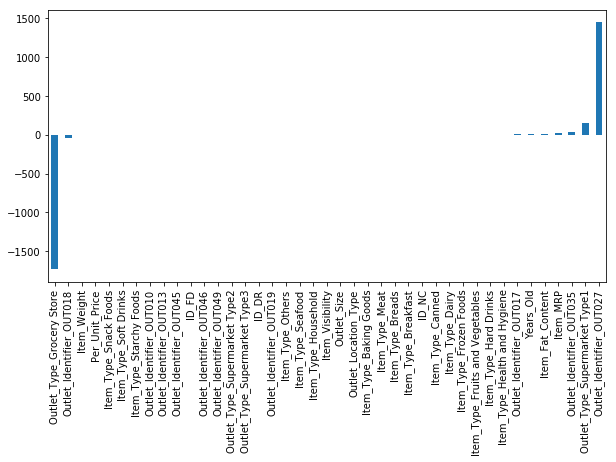

In [182]:
plt.figure(figsize=(10,5))
pd.Series(l.coef_, xtest.columns).sort_values().plot(kind='bar')
plt.show()

### Elastic Net

In [185]:
Enet= ElasticNet(alpha=10, random_state=2)

In [186]:
predEN=Enet.fit(xtrain, ytrain).predict(xtest)

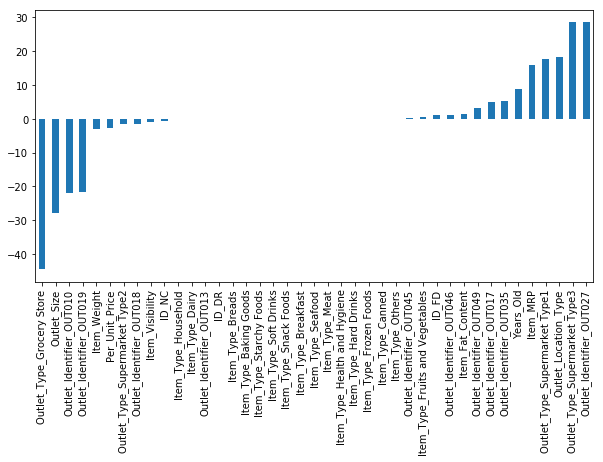

In [192]:
plt.figure(figsize=(10,5))
pd.Series(Enet.coef_, predictors).sort_values().plot(kind='bar')
plt.show()

In [190]:
params={'alpha':[0.01,0.5,1,2,3,4,0.02,0.09,10,50]}